<a href="https://colab.research.google.com/github/bhattaishita/Mail-Detection/blob/main/email_detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import** **Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('stopwords')
from nltk.stem import PorterStemmer
import nltk
from nltk.tokenize import word_tokenize
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = pd.read_csv('/content/spam.csv', encoding = 'latin1')
df = df.sample(frac = 1)
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4575,spam,Congratulations ur awarded 500 of CD vouchers ...,NaN,NaN,NaN
2857,ham,In life when you face choices Just toss a coin...,NaN,NaN,NaN
3853,ham,oh ya... Got hip hop open. Haha i was thinking...,NaN,NaN,NaN
3785,ham,Wat r u doing?,NaN,NaN,NaN
4401,ham,Good FRIENDS CaRE for each Other.. CLoSE Frien...,NaN,NaN,NaN
...,...,...,...,...,...
861,ham,Your brother is a genius,NaN,NaN,NaN
934,spam,Dear Matthew please call 09063440451 from a la...,NaN,NaN,NaN
4983,spam,goldviking (29/M) is inviting you to be his fr...,NaN,NaN,NaN
1435,ham,Dad went out oredi...,NaN,NaN,NaN


**s**

In [ ]:
# Removing the all unnamed columns (its include much number of missing values)
df.drop(columns={'Unnamed: 2','Unnamed: 3','Unnamed: 4'}, inplace=True)

In [ ]:
#  Change the v1 & v2 columns as Category and Message
df.rename(columns={"v1": "Category", "v2": "Message"}, inplace=True)

In [ ]:
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  5572
Number of columns are:  2


In [ ]:
print(df.columns)

Index(['Category', 'Message'], dtype='object')


In [ ]:

# Create a binary 'Spam' column: 1 for 'spam' and 0 for 'ham', based on the 'Category' column.
df['Spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)

In [ ]:
# Updated new dataset
df.head()

,Category,Message,Spam
4575,spam,Congratulations ur awarded 500 of CD vouchers ...,1
2857,ham,In life when you face choices Just toss a coin...,0
3853,ham,oh ya... Got hip hop open. Haha i was thinking...,0
3785,ham,Wat r u doing?,0
4401,ham,Good FRIENDS CaRE for each Other.. CLoSE Frien...,0


In [ ]:
print(len(df[df['Spam'] == 1]))
print(len(df[df['Spam'] == 0]))

747
4825


In [ ]:
df.drop(columns={'Category'}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5572 entries, 4575 to 419
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Message  5572 non-null   object
 1   Spam     5572 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 130.6+ KB


In [ ]:
# Remove duplicate rows
df = df.drop_duplicates()
print(df)

                                                Message  Spam
4575  Congratulations ur awarded 500 of CD vouchers ...     1
2857  In life when you face choices Just toss a coin...     0
3853  oh ya... Got hip hop open. Haha i was thinking...     0
3785                                     Wat r u doing?     0
4401  Good FRIENDS CaRE for each Other.. CLoSE Frien...     0
...                                                 ...   ...
861                            Your brother is a genius     0
934   Dear Matthew please call 09063440451 from a la...     1
4983  goldviking (29/M) is inviting you to be his fr...     1
1435                             Dad went out oredi...      0
419   Send a logo 2 ur lover - 2 names joined by a h...     1

[5169 rows x 2 columns]


In [ ]:
# Remove rows with any null values
df = df.dropna()
print(df)

                                                Message  Spam
4575  Congratulations ur awarded 500 of CD vouchers ...     1
2857  In life when you face choices Just toss a coin...     0
3853  oh ya... Got hip hop open. Haha i was thinking...     0
3785                                     Wat r u doing?     0
4401  Good FRIENDS CaRE for each Other.. CLoSE Frien...     0
...                                                 ...   ...
861                            Your brother is a genius     0
934   Dear Matthew please call 09063440451 from a la...     1
4983  goldviking (29/M) is inviting you to be his fr...     1
1435                             Dad went out oredi...      0
419   Send a logo 2 ur lover - 2 names joined by a h...     1

[5169 rows x 2 columns]


In [ ]:
df.shape

(5169, 2)

**PREPROCESSING**

In [ ]:
nltk.download('stopwords')
words = stopwords.words("english")
print(words)


['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#  remove puncutation
punctuations_list = string.punctuation
def remove_punctuations(text):
	temp = str.maketrans('', '', punctuations_list)
	return text.translate(temp)

df['Message']= df['Message'].apply(lambda x: remove_punctuations(x))
df.head()

,Message,Spam
4575,Congratulations ur awarded 500 of CD vouchers ...,1
2857,In life when you face choices Just toss a coin...,0
3853,oh ya Got hip hop open Haha i was thinking can...,0
3785,Wat r u doing,0
4401,Good FRIENDS CaRE for each Other CLoSE Friends...,0


In [ ]:
#removinf stop-words
def remove_stopwords(text):
	stop_words = stopwords.words('english')

	imp_words = []

	# Storing the important words
	for word in str(text).split():
		word = word.lower()

		if word not in stop_words:
			imp_words.append(word)

	output = " ".join(imp_words)

	return output


df['Message'] = df['Message'].apply(lambda text: remove_stopwords(text))
df.head()

,Message,Spam
4575,congratulations ur awarded 500 cd vouchers 125...,1
2857,life face choices toss coin becoz settle quest...,0
3853,oh ya got hip hop open haha thinking go jazz z...,0
3785,wat r u,0
4401,good friends care close friends understand tru...,0


In [ ]:
X = df['Message']
y = df['Spam']

**spliting** **the** **data**

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Feature** **Extraction**

In [ ]:
#Transorm data into feature vectors
# Creating a TfidfVectorizer for feature extraction
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

# Transforming the training data into TF-IDF feature matrix
X_train_feature = feature_extraction.fit_transform(X_train)

# Transforming the test data using the same vectorizer as used for training data
X_test_feature = feature_extraction.transform(X_test)

# Converting the data type of training labels to integer
y_train = y_train.astype('int')

# Converting the data type of test labels to integer
y_test = y_test.astype('int')


In [ ]:
print(X_train_feature)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 30796 stored elements and shape (4135, 8009)>
  Coords	Values
  (0, 6366)	0.6295127106901672
  (0, 3582)	0.5494150284982737
  (0, 927)	0.5494150284982737
  (1, 2472)	0.31054745636019143
  (1, 5358)	0.4052719649654719
  (1, 3717)	0.47943531467440004
  (1, 6947)	0.3569843660294769
  (1, 3605)	0.6180767373189445
  (2, 861)	0.3599731197251357
  (2, 3701)	0.21240269989788488
  (2, 7537)	0.3465749662490056
  (2, 7622)	0.3865019752127851
  (2, 6630)	0.36922875115437287
  (2, 5673)	0.4634127716628432
  (2, 863)	0.452465683183048
  (3, 3970)	0.5283981911094036
  (3, 7184)	0.18846277724496446
  (3, 1125)	0.15091338175285393
  (3, 2067)	0.1528487554871347
  (3, 1220)	0.2388006409835605
  (3, 3321)	0.25056717790529504
  (3, 7644)	0.3272629488780779
  (3, 4771)	0.2388006409835605
  (3, 2788)	0.25056717790529504
  (3, 7939)	0.44795311524493203
  :	:
  (4131, 2510)	0.4967584507350381
  (4131, 7188)	0.2305848566353266
  (4131, 2784)	0.25713

**Logistic** **Regression**

In [ ]:
#for logistic regression
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg_model = lg.fit(X_train_feature, y_train)

In [ ]:
# #to dump model
import pickle as pk
filename = 'model.pickle'
pk.dump(lg_model, open(filename, 'wb'))

In [ ]:
# Predicting labels on the training data using the trained model
pred_on_training_data = lg.predict(X_train_feature)

# Calculating accuracy on the training data by comparing predicted labels with actual labels
acc_on_training_data = accuracy_score(y_train, pred_on_training_data)
print("Accuracy on training data:",acc_on_training_data)

Accuracy on training data: 0.958162031438936


In [ ]:
# test data set result
pred_on_test_data = lg.predict(X_test_feature)
acc_on_test_data = accuracy_score(y_test, pred_on_test_data)
print("Accuracy on test data:",acc_on_test_data)


Accuracy on test data: 0.9564796905222437


In [ ]:

input_your_mail = ["XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL"]
input_data_features = feature_extraction.transform(input_your_mail)
prediction = lg.predict(input_data_features)

if(prediction[0] == 1):
  print("Spam mail")
else:
  print("Ham mail")

Ham mail


In [ ]:
# Confusion matrix for test data
conf_matrix = confusion_matrix(y_test, pred_on_test_data)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[907   1]
 [ 44  82]]


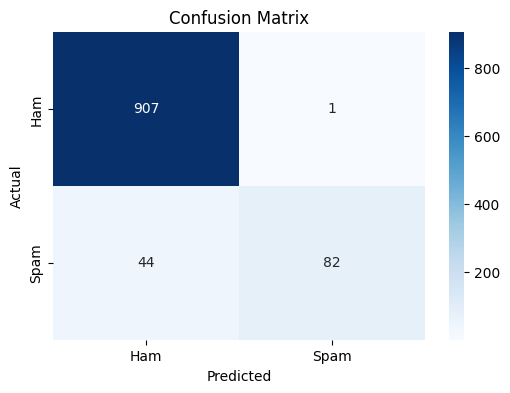

In [ ]:
# Visualizing confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Classification report
print("Classification Report:\n", classification_report(y_test, pred_on_test_data))


Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       908
           1       0.99      0.65      0.78       126

    accuracy                           0.96      1034
   macro avg       0.97      0.82      0.88      1034
weighted avg       0.96      0.96      0.95      1034



In [ ]:
from sklearn.svm import SVC
svc= SVC()
svc.fit(X_train_feature,y_train)

SVC()

In [ ]:
X_test

,Message
4070,ive reached home n bathe liao u call
5180,babe fucking love know fuck good hear voice ne...
4398,yes finished watching days lives love
3383,free msgwe billed mobile number mistake shortc...
615,happy valentines day know early hundreds hands...
...,...
1914,new textbuddy chat 2 horny guys ur area 4 25p ...
3784,let know need anything else salad desert somet...
4966,donate å£250 unicefs asian tsunami disaster su...
2035,simply sitting watching match office


In [ ]:
y_test

,Spam
4070,0
5180,0
4398,0
3383,1
615,0
...,...
1914,1
3784,0
4966,1
2035,0


In [ ]:
#test aucc
svc_accuracy= round(accuracy_score(y_test, pred_on_test_data)*100,2) # Accuracy
svc_accuracy

95.65

In [ ]:
# Predicting labels on the training data using the trained model
pred_on_training_data = svc.predict(X_train_feature)

# Calculating accuracy on the training data by comparing predicted labels with actual labels
acc_on_training_data = accuracy_score(y_train, pred_on_training_data)
print("Accuracy on training data:",acc_on_training_data)

Accuracy on training data: 0.9980652962515115


In [ ]:
Y_pred = svc.predict(X_test_feature)
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

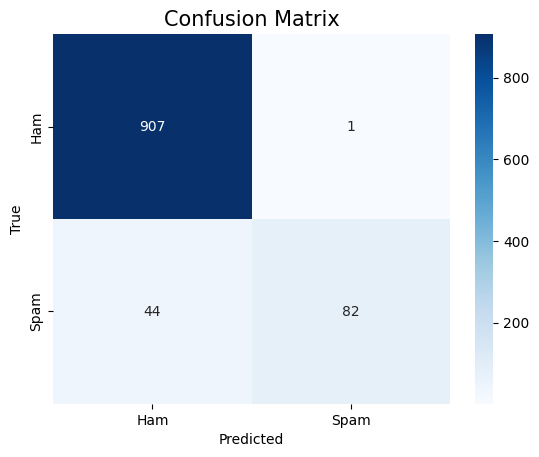

In [ ]:
cm=confusion_matrix(y_test,Y_pred)
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
cm=confusion_matrix(y_test,Y_pred)
cm

array([[905,   3],
       [ 30,  96]])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
ytest = np.array(y_test)
print(classification_report(ytest,svc.predict(X_test_feature)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       908
           1       0.97      0.76      0.85       126

    accuracy                           0.97      1034
   macro avg       0.97      0.88      0.92      1034
weighted avg       0.97      0.97      0.97      1034

